Importing useful libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [67]:
import sqlite3

In [68]:
con=sqlite3.connect(r"D:\DOCUMENT\RAKSHA\project\NLP_strength of pass\password_data.sqlite")

In [69]:
data=pd.read_sql("select * from Users",con)

In [70]:
data.head()

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


In [71]:
data.drop(['index'],axis=1,inplace=True)

In [72]:
data.isnull().sum()
data.isnull().any().sum()

0

In [73]:
data.dtypes

password    object
strength     int64
dtype: object

In [74]:
data.shape

(100000, 2)

In [75]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

Checking how many passwords only have numeric,alpha-numeric,uppercase,special char,title-case

In [76]:
type(data['password'][0])

str

In [77]:
data['length']=data['password'].str.len()

In [78]:
data['password'].str.isnumeric().sum()

26

In [79]:
data['password'].str.isalpha().sum()

50

In [80]:
data['password'].str.isalnum().sum()

97203

In [81]:
data['password'].str.istitle().sum()

932

In [82]:
special_char=string.punctuation
print(special_char)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [83]:
data['password']

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [84]:
def special_character(x):
    for i in x:
        if i in special_char :
            return 1
        else:
            pass

In [85]:
(data['password'].apply(special_character)==1).sum()

2663

In [86]:
def lowercase_freq(x):
    return(len([i for i in x if i.islower()])/len(x))

In [87]:
def uppercase_freq(x):
    return(len([i for i in x if i.isupper()])/len(x))

In [88]:
def digit_freq(x):
    return len([i for i in x if i.isdigit()])/len(x)

In [89]:
def specialchar_freq(x):
    special_char=[]
    for i in x:
        if not i.isalpha() and not i.isdigit():
            special_char.append(i)
    return len(special_char)/len(x)       

In [92]:
data['lowercase_freq']=np.round(data['password'].apply(lowercase_freq),3)
data['uppercase_freq']=np.round(data['password'].apply(uppercase_freq),3)
data['digit_freq']=np.round(data['password'].apply(digit_freq),3)
data['specialChar_freq']=np.round(data['password'].apply(specialchar_freq),3)

In [93]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,specialChar_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000
2,soporte13,1,9,0.778,0.0,0.222,0.000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043
4,c443balg,1,8,0.625,0.0,0.375,0.000


In [95]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'specialChar_freq'],
      dtype='object')

In [99]:
col=['length', 'lowercase_freq', 'uppercase_freq','digit_freq', 'specialChar_freq']

for i in col:
    print(data[[i,'strength']].groupby(['strength']).agg(['max','min','mean','median']))
    print('\n')

         length                      
            max min       mean median
strength                             
0             7   1   6.550947    7.0
1            13   8   9.611074    9.0
2           220  14  15.953421   16.0


         lowercase_freq                      
                    max  min      mean median
strength                                     
0                 1.000  0.0  0.708050  0.714
1                 0.923  0.0  0.630067  0.667
2                 0.917  0.0  0.424679  0.400


         uppercase_freq                      
                    max  min      mean median
strength                                     
0                 1.000  0.0  0.012872  0.000
1                 0.923  0.0  0.007915  0.000
2                 0.889  0.0  0.367633  0.429


         digit_freq                      
                max  min      mean median
strength                                 
0             1.000  0.0  0.275383  0.286
1             0.923  0.0  0.360123  0.333
2   

Length:
Strength 0:
Max: 7, Min: 1, Mean: 6.55, Median: 7
Passwords in this strength category tend to be short. The maximum length is 7, and most passwords are close to this length (median = 7).
Strength 1:
Max: 13, Min: 8, Mean: 9.61, Median: 9
These passwords are slightly longer than strength 0, with a maximum length of 13 and a median length of 9.
Strength 2:
Max: 220, Min: 14, Mean: 15.95, Median: 16
These passwords are much longer on average. The maximum length of 220 indicates that some passwords in this category are extremely long, though the median (16) shows that most are around this length.


2. Lowercase Frequency:
Strength 0:
Max: 1.0, Min: 0.0, Mean: 0.71, Median: 0.714
These passwords predominantly use lowercase letters, as the mean and median are both close to 0.71, meaning roughly 71% of the characters are lowercase.
Strength 1:
Max: 0.923, Min: 0.0, Mean: 0.63, Median: 0.667
These passwords also have a high frequency of lowercase letters, but slightly less than strength 0.
Strength 2:
Max: 0.917, Min: 0.0, Mean: 0.42, Median: 0.4
Strength 2 passwords use less lowercase on average, with a mean of 0.42, showing that only 42% of the characters tend to be lowercase.

3. Uppercase Frequency:
Strength 0:
Max: 1.0, Min: 0.0, Mean: 0.0129, Median: 0.0
Strength 0 passwords use very few uppercase letters (the mean is close to 0), and the median is 0, meaning that most passwords in this category don’t use uppercase at all.
Strength 1:
Max: 0.923, Min: 0.0, Mean: 0.0079, Median: 0.0
Similar to strength 0, strength 1 passwords have almost no uppercase letters.
Strength 2:
Max: 0.889, Min: 0.0, Mean: 0.368, Median: 0.429
Strength 2 passwords, on the other hand, use uppercase letters much more frequently, with the median showing that roughly 43% of the characters in these passwords are uppercase.

4. Digit Frequency:
Strength 1:
Max: 0.818, Min: 0.0, Mean: 0.0019, Median: 0.0
Strength 1 passwords rarely use digits (median = 0).
Strength 2:
Max: 0.741, Min: 0.0, Mean: 0.0139, Median: 0.0
Strength 2 passwords also don’t often use digits, though they use them slightly more than strength 1 passwords.

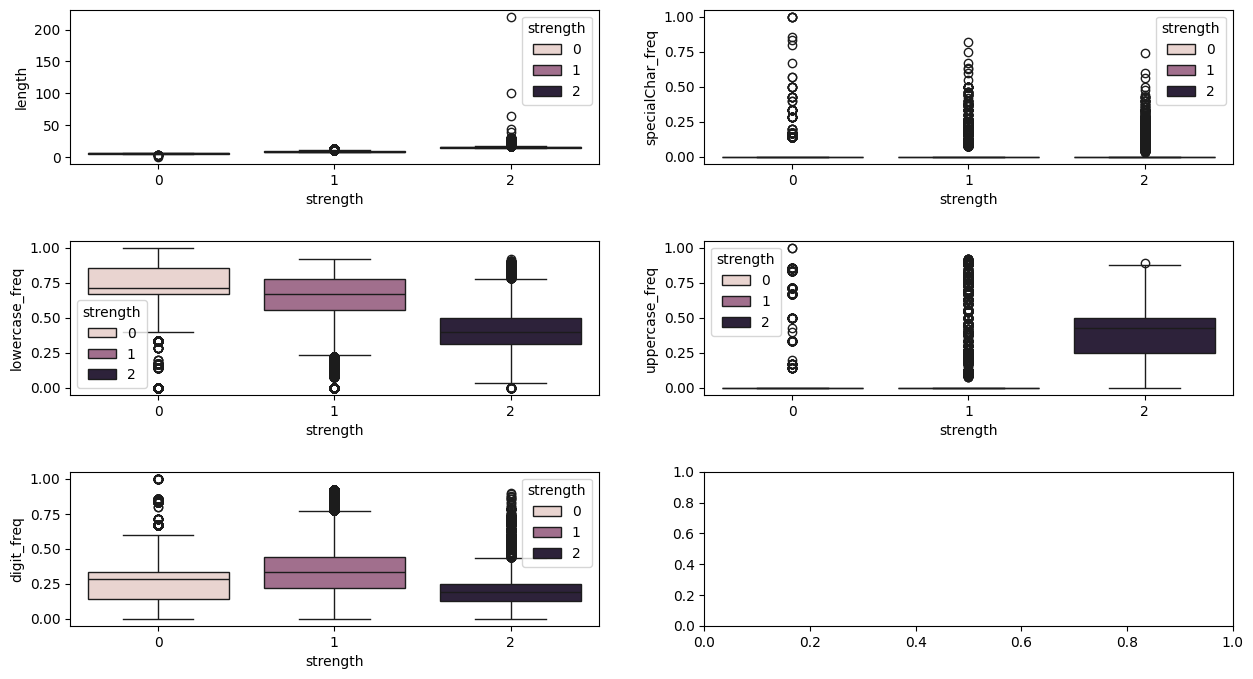

In [108]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(3,2,figsize=(15,8))

sns.boxplot(x='strength',y='length',hue='strength',ax=ax1,data=data)
sns.boxplot(x='strength',y='specialChar_freq',hue='strength',ax=ax2,data=data)
sns.boxplot(x='strength',y='lowercase_freq',hue='strength',ax=ax3,data=data)
sns.boxplot(x='strength',y='uppercase_freq',hue='strength',ax=ax4,data=data)
sns.boxplot(x='strength',y='digit_freq',hue='strength',ax=ax5,data=data)

plt.subplots_adjust(hspace=0.5)

Strength 2 passwords seem to have a longer median length compared to strengths 0 and 1, but there are outliers in all categories.

Strength 2 has higher special character usage, while strength 0 passwords tend to have very low to no special character usage.

Strength 0 and strength 1 passwords have a relatively higher frequency of lowercase letters, while strength 2 shows a more variable distribution.

Strength 2 passwords show a higher frequency of uppercase usage, with strength 0 and 1 having fewer uppercase letters

Strength 2 appears to have higher digit frequency compared to strengths 0 and 1.

In [144]:
def get_dist(data,feature):
    
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    sns.violinplot(x='strength',y=feature, data=data)
    
    plt.subplot(1,2,2)
    sns.distplot(data[data['strength']==0][feature],color='red',label='0',hist=False)
    sns.distplot(data[data['strength']==1][feature],color='yellow',label='1',hist=False)
    sns.distplot(data[data['strength']==2][feature],color='green',label='2',hist=False)
    
    plt.legend()
    plt.show()
    

In [145]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

In [146]:
cols=['length','lowercase_freq','uppercase_freq','digit_freq','specialChar_freq']

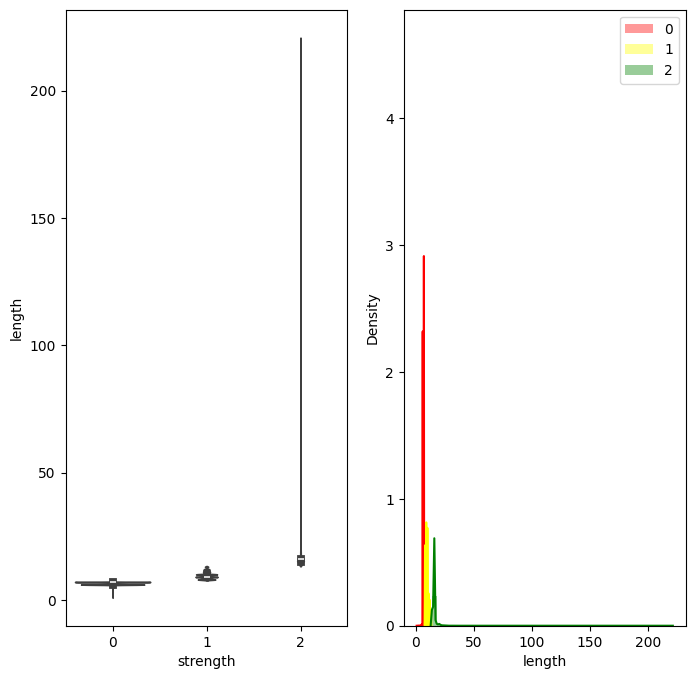

length, None


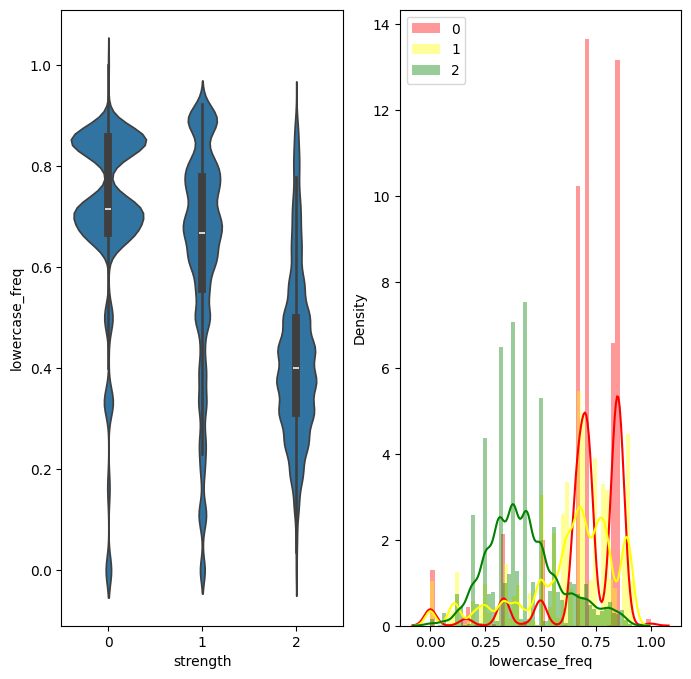

lowercase_freq, None


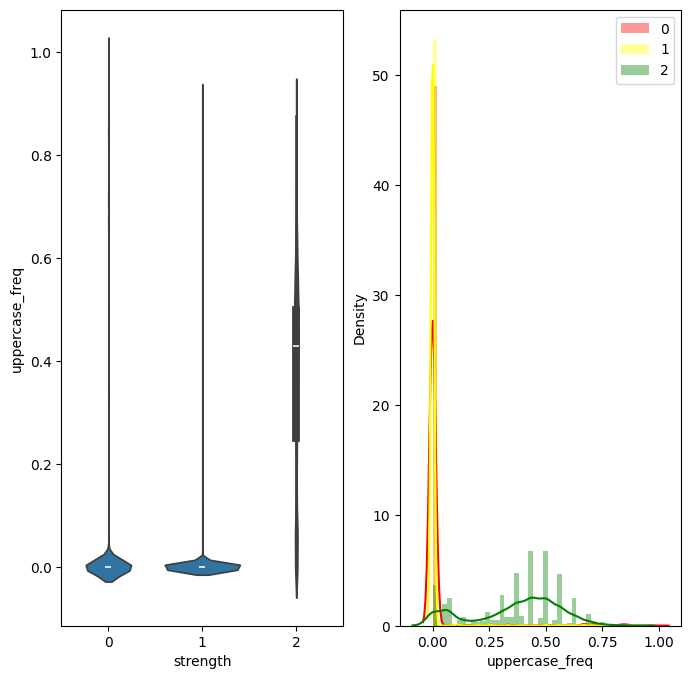

uppercase_freq, None


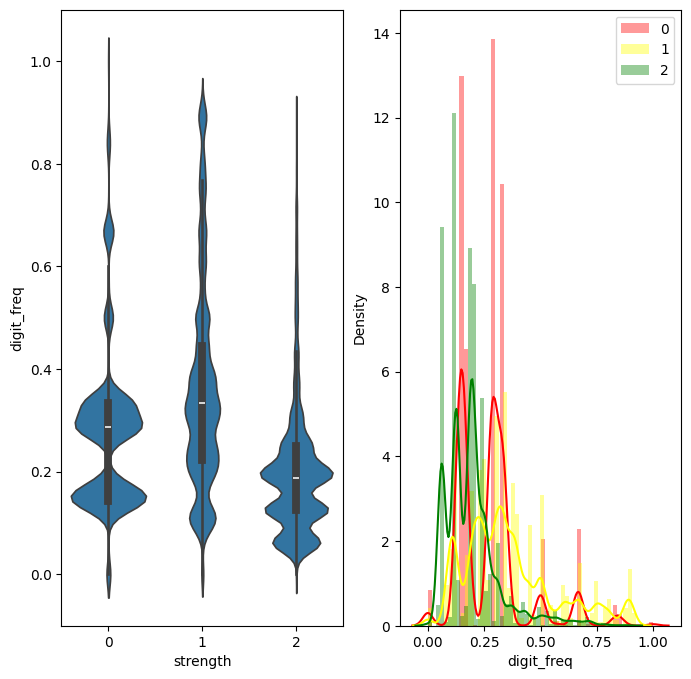

digit_freq, None


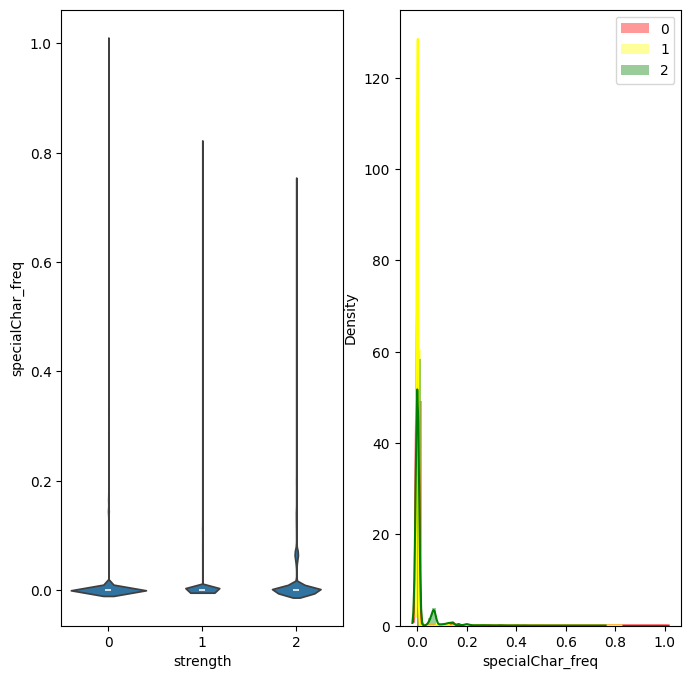

specialChar_freq, None


In [140]:
for i in cols:
    print(f'{i}, {get_dist(data, i)}')

Length

we have few overlappping region in distribution plot 
when class is 2 , we have higher value of 'length' than class 1 & class 0

it means 'length' is a interesting feature as we have very less overlapping region

similarly from violinplot ,we will say on account of less overlappping , 
this feature 'length' is amazing & useful in determining the strength


LowerCase

we have some kind of overlappping region in distribution plot 
when class is 2 , we have less value of 'lower_freq' than class 1 & class 0

it means 'lower_freq' is a interesting feature upto some extent as have some overlapping region

similarly from violinplot ,we will say on account of such overlappping , 
when class is 2 we have less value of 'lower_freq' than class 1 & class 0
this feature 'lower_freq' is a interesting feature upto some extent in determining the strength

UpperCAse

we have quite high overlappping region in distribution plot 

it means 'upper_freq' is not that much interesting feature as have some overlapping region

similarly from violinplot ,we will say on account of such huge overlappping , 
this feature 'lower_freq' is not a interesting feature in determining the strength

Digit

we have quite high overlappping region in distribution plot 

it means 'upper_freq' is not that much interesting feature as have some overlapping region

similarly from violinplot ,we will say on account of such huge overlappping , 
this feature 'lower_freq' is not a interesting feature in determining the strength

TF_IDF

TF(t,d)= Total number of terms in document d/Number of times term t appears in document d
​
 
IDF(t,D)=log( Number of documents containing term t/Total number of documents)

TF-IDF(t,d,D)=TF(t,d)×IDF(t,D)

In [147]:
data

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,specialChar_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000
2,soporte13,1,9,0.778,0.0,0.222,0.000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043
4,c443balg,1,8,0.625,0.0,0.375,0.000
...,...,...,...,...,...,...,...
99995,obejofi215,1,10,0.700,0.0,0.300,0.000
99996,fmiopvxb64,1,10,0.800,0.0,0.200,0.000
99997,czvrbun38,1,9,0.778,0.0,0.222,0.000
99998,mymyxe430,1,9,0.667,0.0,0.333,0.000


In [148]:
df=data.sample(frac=1)  #it shuffles

In [149]:
df

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,specialChar_freq
81204,samansijla1,1,11,0.909,0.000,0.091,0.000
92120,AlEwadaNaZuS674,2,15,0.467,0.333,0.200,0.000
68779,seiha.ching2908199020021990,2,27,0.370,0.000,0.593,0.037
61111,ofees1983,1,9,0.556,0.000,0.444,0.000
28942,udere238,1,8,0.625,0.000,0.375,0.000
...,...,...,...,...,...,...,...
27535,ceylin2008,1,10,0.600,0.000,0.400,0.000
66416,fuckoff001,1,10,0.700,0.000,0.300,0.000
70041,hfzqrubl68,1,10,0.800,0.000,0.200,0.000
96394,pUFHcQTA3MQuTwkN,2,16,0.312,0.625,0.062,0.000


In [154]:
x=list(df['password'])   # converting str to vector

In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [152]:
vect=TfidfVectorizer(analyzer="char")

In [158]:
X=vect.fit_transform(x)

In [159]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [160]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.19754802, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.57073752, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.2309427 , 0.33010575, 0.        , 0.27433921, 0.26291906,
       0.24456804, 0.        , 0.        , 0.        , 0.        ,
       0.51838901, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [162]:
len(vect.get_feature_names_out())

99

In [164]:
df2 = pd.DataFrame(X.toarray() , columns=vect.get_feature_names_out())

In [165]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [166]:
df.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'specialChar_freq'],
      dtype='object')

In [167]:
df2['length']=df['length']
df2['lowercase_freq']=df['lowercase_freq']


In [168]:
df2.head()

,,,,,,,,,!,#,...,ú,ü,ý,þ,›,length,lowercase_freq,uppercase_freq,digit_freq,specialChar_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9,0.333,0.0,0.667,0.000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12,0.417,0.0,0.583,0.000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9,0.778,0.0,0.222,0.000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,23,0.783,0.0,0.174,0.043
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8,0.625,0.0,0.375,0.000


In [169]:
y=df['strength']

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
Xtrain,Xtest,ytrain,ytest=train_test_split(df2,y,test_size=0.02)

In [172]:
from sklearn.linear_model import LogisticRegression

In [173]:
lr=LogisticRegression(multi_class="multinomial")

In [174]:
lr.fit(Xtrain,ytrain)

LogisticRegression(multi_class='multinomial')

In [176]:
y_pred=lr.predict(Xtest)

In [177]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [179]:
confusion_matrix(ytest,y_pred)

array([[  48,  223,    0],
       [  45, 1386,   24],
       [   2,  111,  161]], dtype=int64)

In [180]:
accuracy_score(ytest,y_pred)

0.7975

In [182]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.18      0.26       271
           1       0.81      0.95      0.87      1455
           2       0.87      0.59      0.70       274

    accuracy                           0.80      2000
   macro avg       0.73      0.57      0.61      2000
weighted avg       0.77      0.80      0.77      2000

